In [14]:
import sys
!{sys.executable} -m pip install 


/Users/scotthillard/anaconda3/bin/python: No module named pip3


In [19]:
#Check what modules are installed
help("modules")


Please wait a moment while I gather a list of all available modules...



/Users/scotthillard/anaconda3/lib/python3.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
/Users/scotthillard/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/Users/scotthillard/anaconda3/lib/python3.7/site-packages/nltk/twitter/__init__.py:22: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  "The twython library has not been installed. "
/Users/scotthillard/anaconda3/lib/python3.7/site-packages/skimage/novice/__init__.py:103: UserWarning: The `skimage.novice` module was deprecated in version 0.14

Crypto              brain_hashlib       json                resource
Cython              brain_http          jsonschema          rlcompleter
IPython             brain_io            jupyter             rmagic
OpenSSL             brain_mechanize     jupyter_client      rope
PIL                 brain_multiprocessing jupyter_console     rtree
PyQt5               brain_namedtuple_enum jupyter_core        ruamel_yaml
__future__          brain_nose          jupyterlab          runpy
_abc                brain_numpy         jupyterlab_server   sched
_ast                brain_pkg_resources keyring             scipy
_asyncio            brain_pytest        keyword             scripts
_bisect             brain_qt            kiwisolver          seaborn
_blake2             brain_random        landsatxplore       secrets
_bootlocale         brain_re            lazy_object_proxy   select
_bz2                brain_six           lib2to3             selectors
_cffi_backend       brain_ssl           libarc

In [23]:
import landsatxplore.api
from landsatxplore.earthexplorer import EarthExplorer


ee = EarthExplorer('*', '*')
# Initialize a new API instance and get an access key
api = landsatxplore.api.API('*', '*')

# Request
scenes = api.search(
    dataset='LANDSAT_8_C1',
    latitude=36.3144,
    longitude=8.70273,
    start_date='2018-01-01',
    end_date='2019-01-01'
    max_cloud_cover=10)

print('{} scenes found.'.format(len(scenes)))


SyntaxError: invalid syntax (<ipython-input-23-50704445379c>, line 18)

In [21]:
#Get more information aboutr which scenes you can download
scene_list=[]
for scene in scenes:
    print(scene['acquisitionDate'])
    print(scene['entityId'])
    print(scene['cloudCover'])
    scene_list.append(scene['entityId'])
    #ee.download(scene_id=scene['entityId'], output_dir='./data')
# the above line can be un-commented out and all the scene will
# download, to pick a specific scene insert the id code in the 'entityId' 
api.logout()
ee.logout()

2018-01-05
LC81920352018005LGN00
0.06
2018-02-06
LC81920352018037LGN00
8.26
2018-03-10
LC81920352018069LGN00
0.02
2018-04-11
LC81920352018101LGN00
0.09
2018-06-14
LC81920352018165LGN00
6.78
2018-06-30
LC81920352018181LGN00
0.03
2018-08-01
LC81920352018213LGN00
0.17
2018-09-02
LC81920352018245LGN00
4.34
2018-11-05
LC81920352018309LGN00
0.35
2018-11-21
LC81920352018325LGN00
0.03
2018-12-23
LC81920352018357LGN00
0.09
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): earthexplorer.usgs.gov:443
DEBUG:urllib3.connectionpool:https://earthexplorer.usgs.gov:443 "GET /inventory/json/v/1.4.1/logout?jsonRequest=%7B%22apiKey%22%3A+%227680150643754ee0a492245b706ed4bf%22%7D HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Resetting dropped connection: earthexplorer.usgs.gov
DEBUG:urllib3.connectionpool:https://earthexplorer.usgs.gov:443 "GET /logout HTTP/1.1" 302 0
DEBUG:urllib3.connectionpool:https://earthexplorer.usgs.gov:443 "GET / HTTP/1.1" 200 None


In [8]:
import os
import tarfile

#Create output folder Time 2
newFolder = "LandsatData2018_January"
os.makedirs('/Users/scotthillard/Documents/Landsat_data/'+newFolder)

#Extract files Time 2
os.chdir('/Users/scotthillard/Documents/')
tar = tarfile.open("Landsat_data/raw_ls/LC081920352018010501T1-SC20190602174544.tar.gz", "r:gz")
tar.extractall('/Users/scotthillard/Documents/Landsat_data/'+newFolder)
tar.close()

#Create output folder Time 1
newFolder = "LandsatData2017_January"
os.makedirs('/Users/scotthillard/Documents/Landsat_data/'+newFolder)

#Extract files Time 1
os.chdir('/Users/scotthillard/Documents/')
tar = tarfile.open("Landsat_data/raw_ls/LC081920352017010201T1-SC20190602174626.tar.gz", "r:gz")
tar.extractall('/Users/scotthillard/Documents/Landsat_data/'+newFolder)
tar.close()


In [18]:
#Set the Environment
from glob import glob
import os, sys

import numpy.ma as ma
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches as mpatches, colors
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import seaborn as sns

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.mask import mask
import geopandas as gpd
from shapely.geometry import mapping

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

from sklearn import cluster

plt.ion()
sns.set_style('white')
sns.set(font_scale=1.5)

['LandsatData2018_January/LC08_L1TP_192035_20180105_20180118_01_T1_sr_band1.tif', 'LandsatData2018_January/LC08_L1TP_192035_20180105_20180118_01_T1_sr_band2.tif', 'LandsatData2018_January/LC08_L1TP_192035_20180105_20180118_01_T1_sr_band3.tif', 'LandsatData2018_January/LC08_L1TP_192035_20180105_20180118_01_T1_sr_band4.tif', 'LandsatData2018_January/LC08_L1TP_192035_20180105_20180118_01_T1_sr_band5.tif', 'LandsatData2018_January/LC08_L1TP_192035_20180105_20180118_01_T1_sr_band6.tif', 'LandsatData2018_January/LC08_L1TP_192035_20180105_20180118_01_T1_sr_band7.tif']


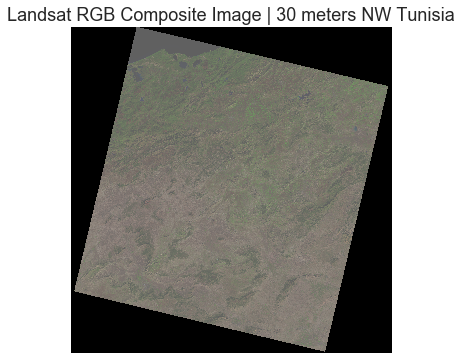

In [4]:
os.chdir(os.path.join(et.io.HOME, 'Documents/Landsat_data/'))

# Stack the landsat 2018 Data
landsat_paths_pre = glob("LandsatData2018_January/*band*.tif")
print(landsat_paths_pre)
path_landsat_pre_st = "/Users/scotthillard/Documents/Landsat_data/outputs/landsat_time18_january2.tif"
es.stack(landsat_paths_pre, path_landsat_pre_st, nodata=None)

# Read the landsat 2018 data
with rio.open(path_landsat_pre_st) as landsat_pre_src:
    landsat_pre = landsat_pre_src.read(masked=False)
    landsat_extent = plotting_extent(landsat_pre_src)

# Define Landast bands for plotting 
landsat_rgb = [4, 3, 2]
landsat_cir = [5,4,3]
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
import earthpy.plot    as ep
ep.plot_rgb(landsat_pre,
            rgb=landsat_cir,
            ax=ax,
            extent=landsat_extent)
ax.set(title="Landsat RGB Composite Image | 30 meters NW Tunisia")
ax.set_axis_off()
plt.show()

# -----Time 1- Processing--------
landsat1_paths_pre = glob("LandsatData2017_January/*band*.tif")
#print(landsat_paths_pre)
path_landsat_pre_st = "/Users/scotthillard/Documents/Landsat_data/outputs/landsat_time17_january2.tif"
es.stack(landsat1_paths_pre, path_landsat_pre_st, nodata=None)

# Read the landsat 2017 data
with rio.open(path_landsat_pre_st) as landsat1_pre_src:
    landsat1_pre = landsat1_pre_src.read(masked=False)
    landsat1_extent = plotting_extent(landsat1_pre_src)


In [5]:
#-Time 2
with rio.open("/Users/scotthillard/Documents/Landsat_data/LandsatData2018_January/LC08_L1TP_192035_20180105_20180118_01_T1_pixel_qa.tif") as landsat_pre_cl:
    landsat_qa = landsat_pre_cl.read(1)
    landsat_ext = plotting_extent(landsat_pre_cl)
    
#water pixels are [324, 388, 836, 900, 1348]
# pre-allocate an array of all zeros representing the same sized array as the landsat scene and cloud mask
cl_mask = np.zeros(landsat_qa.shape)

# Generate array of all possible cloud / shadow values /water
cloud_shadow = [328, 392, 840, 904, 1350]
cloud = [352, 368, 416, 432, 480, 864, 880, 928, 944, 992]
high_confidence_cloud = [480, 992]
waterP = [324, 388, 836, 900, 1348]

all_masked_values = cloud_shadow + cloud + high_confidence_cloud + waterP
all_masked_values

for cval in all_masked_values:
    # create cloud mask for all relevant cloud values, for the primary scene
    cl_mask[landsat_qa == cval] = 1
    # print(cval)

np.unique(cl_mask)

#-Time 1

# Open the pixel_qa layer for your landsat scene
os.chdir('/Users/scotthillard/Documents/Landsat_data/LandsatData2017_January/')
with rio.open("LC08_L1TP_192035_20170102_20170312_01_T1_pixel_qa.tif") as landsat1_pre_cl:
    landsat1_qa = landsat1_pre_cl.read(1)
    landsat1_ext = plotting_extent(landsat1_pre_cl)
#water pixels are [324, 388, 836, 900, 1348]
# pre-allocate an array of all zeros representing the same sized array as the landsat scene and cloud mask
#water pixels are [324, 388, 836, 900, 1348]
# pre-allocate an array of all zeros representing the same sized array as the landsat scene and cloud mask
cl1_mask = np.zeros(landsat1_qa.shape)

# Generate array of all possible cloud / shadow values /water
cloud1_shadow = [328, 392, 840, 904, 1350]
cloud1 = [352, 368, 416, 432, 480, 864, 880, 928, 944, 992]
high_confidence1_cloud = [480, 992]
water1P = [324, 388, 836, 900, 1348]

all_masked1_values = cloud1_shadow + cloud1 + high_confidence1_cloud + water1P
all_masked1_values

# populate new array with values of 1 for every pixel that is a cloud or cloud shadow
for cval in all_masked1_values:
    # create cloud mask for all relevant cloud values, for the primary scene
    cl1_mask[landsat1_qa == cval] = 1
    # print(cval)

np.unique(cl1_mask)



array([0., 1.])

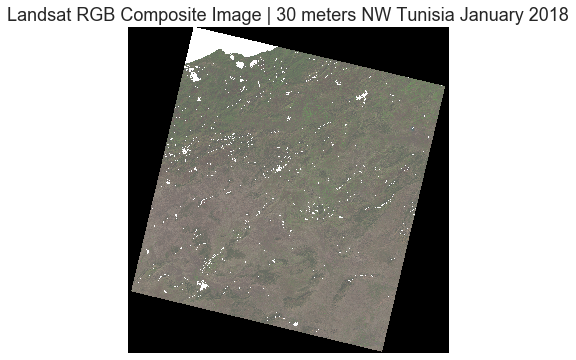

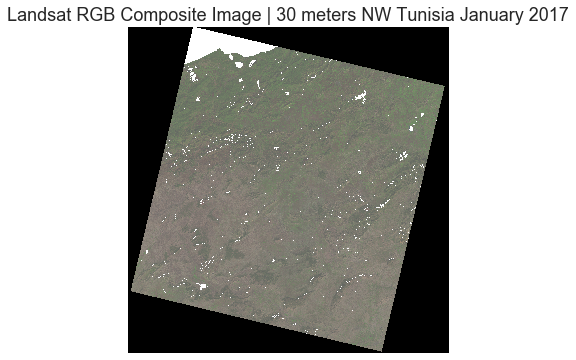

In [8]:
#-Time 2
landsat_pre_mask = np.broadcast_to(cl_mask == 1, landsat_pre.shape)
landsat_pre_cl_free = ma.masked_array(landsat_pre,mask=landsat_pre_mask)
type(landsat_pre_cl_free)


fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ep.plot_rgb(landsat_pre_cl_free,
            rgb=[5, 4, 3],
            extent=landsat_ext,
            ax=ax)
ax.set(title="Landsat RGB Composite Image | 30 meters NW Tunisia January 2018")
ax.set_axis_off()

#-Time 1
landsat1_pre_mask = np.broadcast_to(cl1_mask == 1, landsat1_pre.shape)
landsat1_pre_cl_free = ma.masked_array(landsat1_pre,mask=landsat1_pre_mask)
type(landsat1_pre_cl_free)


fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ep.plot_rgb(landsat1_pre_cl_free,
            rgb=[5, 4, 3],
            extent=landsat_ext,
            ax=ax)
ax.set(title="Landsat RGB Composite Image | 30 meters NW Tunisia January 2017")
ax.set_axis_off()

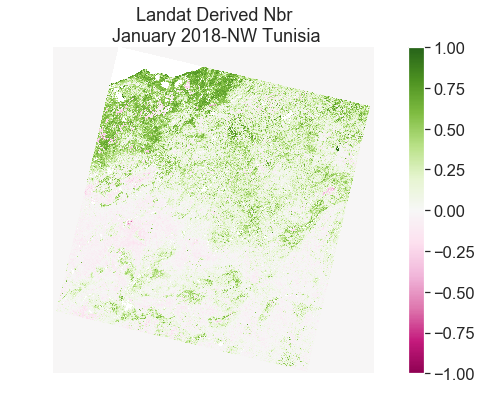

In [9]:
# Time 2
#NDVI =(NIR-red)/(NIR+red)
ndvi_L2018 = (landsat_pre_cl_free[4] - landsat_pre_cl_free[3]) / (landsat_pre_cl_free[4] + landsat_pre_cl_free[3])

#NBR  =(NIR-SWIR)/(NIR+SWIR)
nbr_L2018 = (landsat_pre_cl_free[4] - landsat_pre_cl_free[6]) / (landsat_pre_cl_free[4] + landsat_pre_cl_free[6])

# --Time 1
#NDVI =(NIR-red)/(NIR+red)
ndvi_L2017 = (landsat1_pre_cl_free[4] - landsat1_pre_cl_free[3]) / (landsat1_pre_cl_free[4] + landsat1_pre_cl_free[3])

#NBR  =(NIR-SWIR)/(NIR+SWIR)
nbr_L2017 = (landsat1_pre_cl_free[4] - landsat1_pre_cl_free[6]) / (landsat1_pre_cl_free[4] + landsat1_pre_cl_free[6])

# Plot of time 2
fig, ax = plt.subplots(figsize=(12,6))
nbr = ax.imshow(nbr_L2018, cmap='PiYG',vmin=-1, vmax=1)
fig.colorbar(nbr, fraction=.05)
ax.set(title="Landat Derived Nbr\n January 2018-NW Tunisia")
ax.set_axis_off()
plt.show()

In [10]:
#write both of the indices to a new .tif file
landsat_nbr_path = "/Users/scotthillard/Documents/Landsat_data/outputs/LS_2018/nbr_time18_january.tif"
landsat_ndvi_path = "/Users/scotthillard/Documents/Landsat_data/outputs/LS_2018/ndvi_time18_january.tif"
type(nbr_L2018), nbr_L2018.dtype


landsat1_nbr_path = "/Users/scotthillard/Documents/Landsat_data/outputs/LS_2017/nbr_time17_january.tif"
landsat1_ndvi_path = "/Users/scotthillard/Documents/Landsat_data/outputs/LS_2017/ndvi_time17_january.tif"
type(nbr_L2017), nbr_L2017.dtype

#get some meta data for raster writing
with rio.open("/Users/scotthillard/Documents/NBR_landat_2018.tif") as src:
    naip_data_ras = src.read()
    naip_meta = src.profile
       
naip_meta
# change the data type to float rather than integer
naip_meta['dtype'] = "float64"


#write the raster object
with rio.open(landsat_nbr_path, 'w', **naip_meta) as dst:
    dst.write(nbr_L2018, 1)

with rio.open(landsat_ndvi_path, 'w', **naip_meta) as dst:
    dst.write(ndvi_L2018, 1)

with rio.open(landsat_nbr_path, 'w', **naip_meta) as dst:
    dst.write(nbr_L2017, 1)

with rio.open(landsat_ndvi_path, 'w', **naip_meta) as dst:
    dst.write(ndvi_L2017, 1)

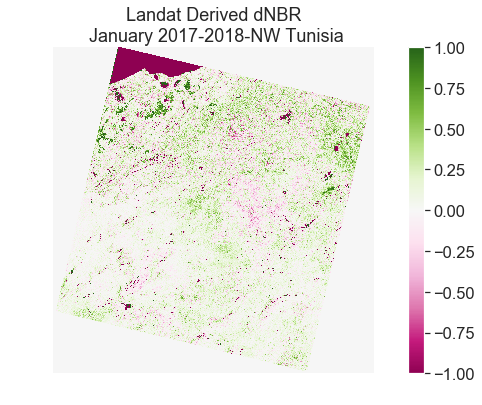

In [12]:
 
with rio.open ("/Users/scotthillard/Documents/Landsat_data/outputs/LS_2017/nbr_time17_january.tif") as nbr_2017:
    landsat_nbr2017 = nbr_2017.read(1)
    landsat_ext_nbr2017= plotting_extent(nbr_2017)

with rio.open(  "/Users/scotthillard/Documents/Landsat_data/outputs/LS_2018/nbr_time18_january.tif") as nbr_2018:
    landsat_nbr2018 = nbr_2018.read(1)
    landsat_ext_nbr2018= plotting_extent(nbr_2018)

#dNBR(postFire-preFire)    
nbr_change = (landsat_nbr2018-landsat_nbr2017) 

# Write the dNBR to a .tif file
landsat_dNBR_path = "/Users/scotthillard/Documents/Landsat_data/outputs/LS_2018/dNBR_2017_2018.tif"
with rio.open(landsat_dNBR_path, 'w', **naip_meta) as dst:
    dst.write(nbr_change, 1)

##Plot the dNBR
fig, ax = plt.subplots(figsize=(12,6))
nbr = ax.imshow(nbr_change, cmap='PiYG',
                vmin=-1, vmax=1)
fig.colorbar(nbr, fraction=.05)
ax.set(title="Landat Derived dNBR\n January 2017-2018-NW Tunisia")
ax.set_axis_off()
plt.show()





In [16]:
#Change the format to read as an array
# Read in raster image
import rasterio
src = rasterio.open('/Users/scotthillard/Documents/Landsat_data/outputs/LS_2018/dNBR_2017_2018.tif')

array = src.read(1)
array.shape
X_array = array.reshape((-1,1))
x1= array.reshape((-1,1))

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9, random_state=0).fit(X)

Sum_of_squared_distances = []
K = range(2,20)
for k in K:
    km = sklearn.cluster.KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

KeyboardInterrupt: 

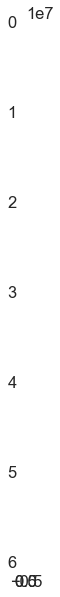

In [15]:
assigned_cluster.shape

In [ ]:
model = sklearn.cluster.KMeans(n_clusters=4)
assigned_cluster = model.fit_predict(NDWI[0].data[0].reshape(-1,1))